In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Checking for duplicated data
df.duplicated().any()

np.True_

In [5]:
df[df.duplicated]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
# dropping duplicates
df = df.drop_duplicates()

In [7]:
# checking for null values
df.isnull().any()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
numeric_cols = df.select_dtypes(include = 'number').columns.to_list()
categorial_cols = df.select_dtypes(exclude = 'number').columns.to_list()
print(f'Numerical columns in data : {numeric_cols}')
print(f'Categorical columns in data : {categorial_cols}')

Numerical columns in data : ['age', 'bmi', 'children', 'charges']
Categorical columns in data : ['sex', 'smoker', 'region']


In [9]:
df.describe() # for numeric_Cols

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(exclude ='number') # for categorical value

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [11]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### Data Visualization

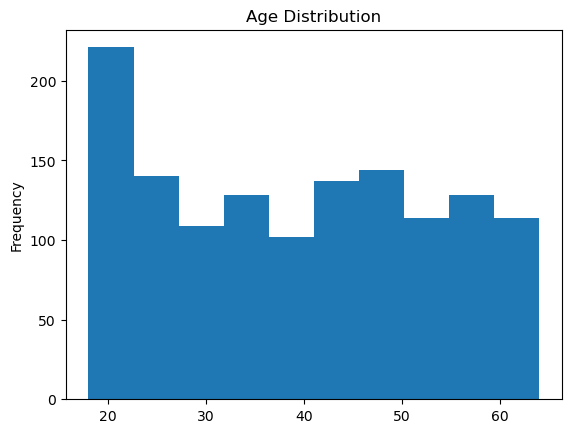

In [12]:
df['age'].plot(kind = 'hist' )
plt.title("Age Distribution")
plt.show()

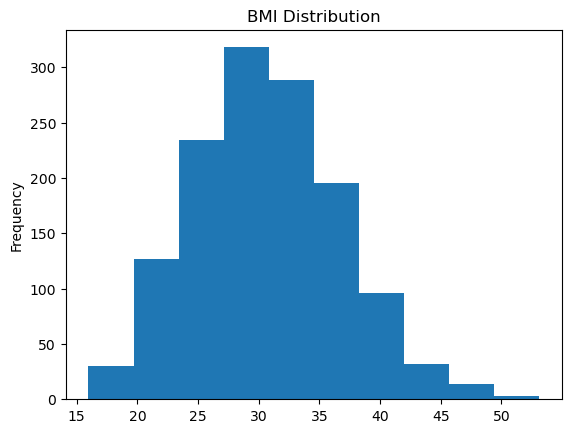

In [13]:
df['bmi'].plot(kind = 'hist' )
plt.title("BMI Distribution")
plt.show()

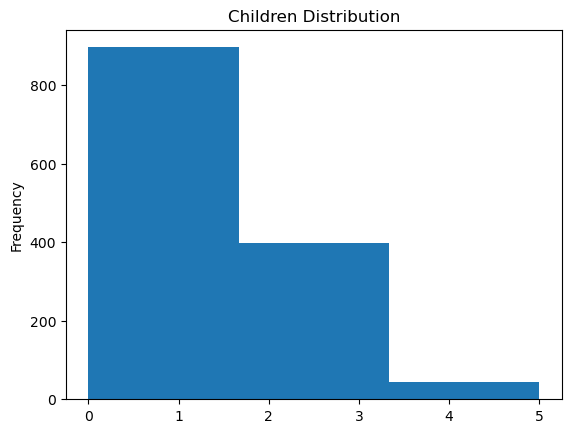

In [14]:
df['children'].plot(kind = 'hist' , bins = 3 )
plt.title("Children Distribution")
plt.show()

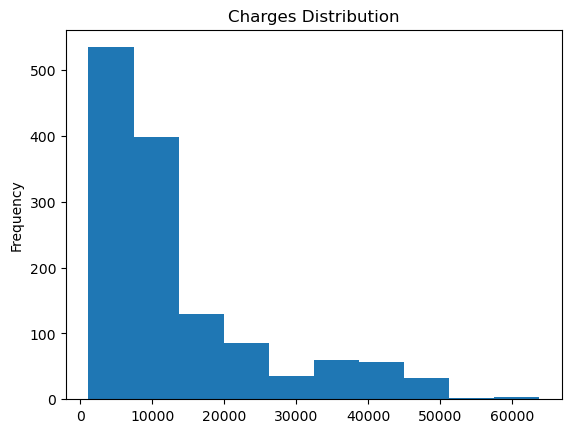

In [15]:
df['charges'].plot(kind = 'hist' )
plt.title("Charges Distribution")
plt.show()

<Axes: xlabel='sex'>

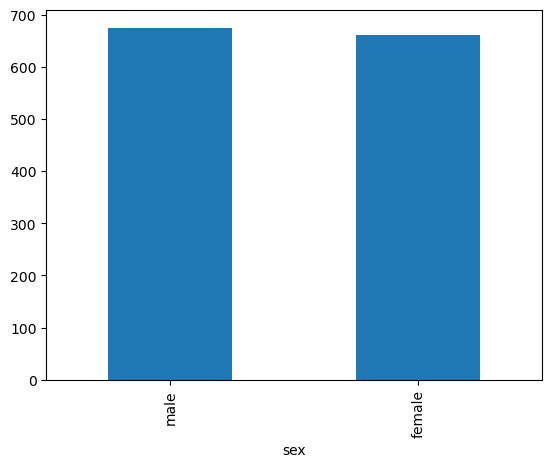

In [16]:
df['sex'].value_counts().plot(kind = 'bar')

<Axes: xlabel='smoker'>

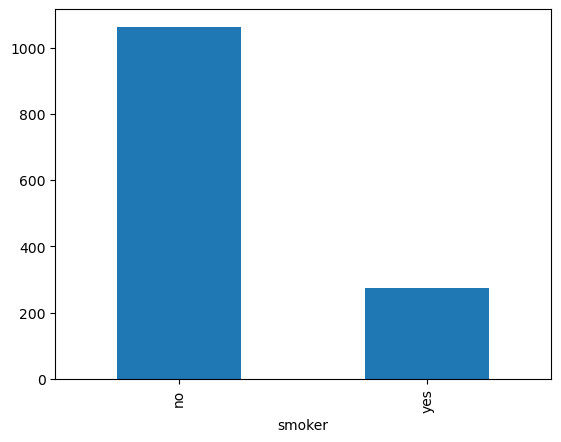

In [17]:
df['smoker'].value_counts().plot(kind = 'bar')

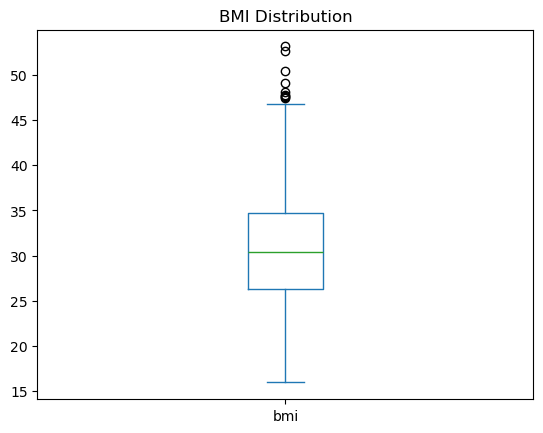

In [18]:
df['bmi'].plot(kind = 'box' )
plt.title("BMI Distribution")
plt.show()

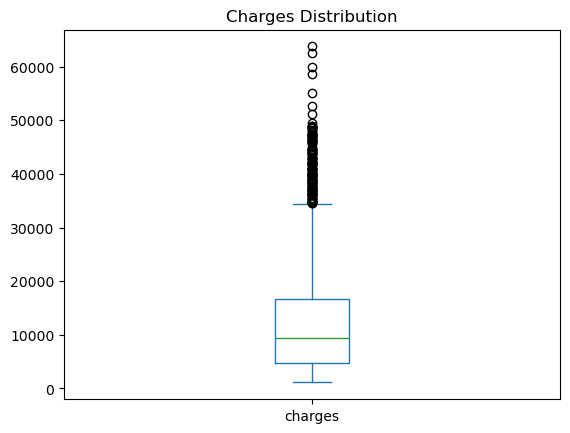

In [19]:
df['charges'].plot(kind = 'box' )
plt.title("Charges Distribution")
plt.show()

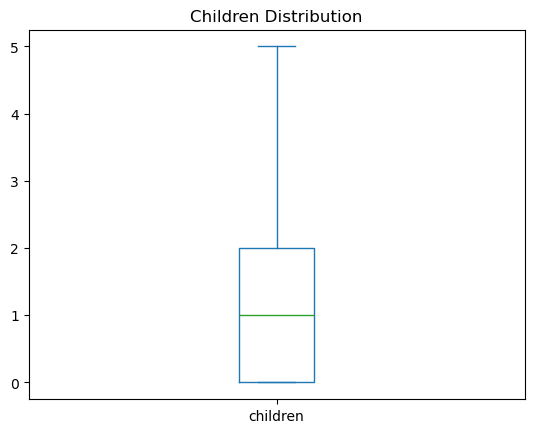

In [20]:
df['children'].plot(kind = 'box' )
plt.title("Children Distribution")
plt.show()

In [21]:
region_count = df['region'].value_counts()

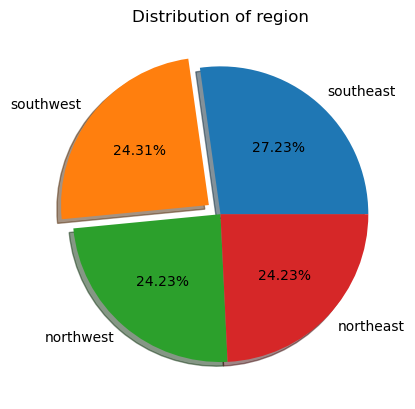

In [22]:
plt.pie(
    labels = region_count.index,   
    x = region_count.values,        
    shadow = True,                 
    autopct = '%.2f%%',             
    explode = (0, 0.1, 0, 0)         
)

plt.title("Distribution of region")
plt.show()


## Correlation Matrix

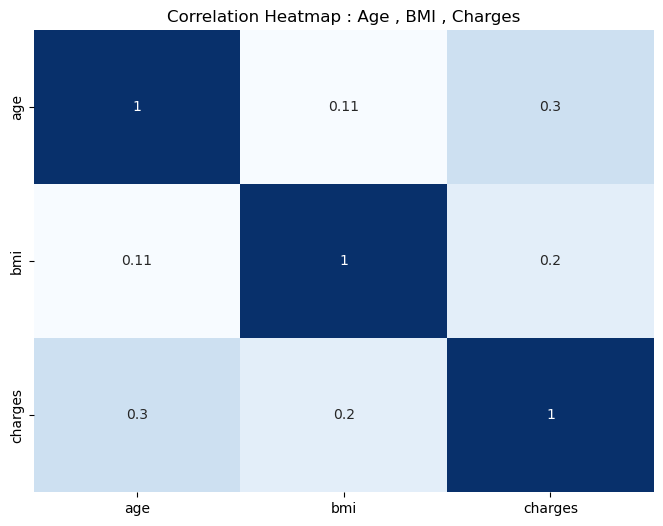

In [23]:
corr_data = df[['age' , 'bmi', 'charges']].corr()
plt.figure(figsize = (8,6))
sns.heatmap(round(corr_data , 2) ,annot = True, cmap = "Blues" , cbar = False)
plt.title("Correlation Heatmap : Age , BMI , Charges")
plt.show()

### Insurance Cost for smoker and non smoker

In [24]:
smoker_df = df.groupby('smoker')['charges'].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


### Insurance Cost for male and female

In [25]:
gender_df = df.groupby('sex')['charges'].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


### Insurance Cost region wise

In [26]:
region_df = df.groupby('region')['charges'].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

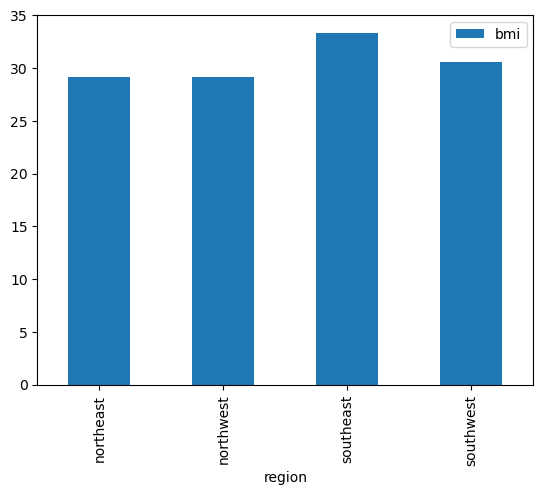

In [27]:
region_bmi_df = df.groupby("region")["bmi"].mean().reset_index()
region_bmi_df.plot(kind = 'bar' , x = 'region' , y = 'bmi')


### Prediction Model

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Feature Scalling
le = LabelEncoder()

In [29]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [31]:
X = df.drop(columns = 'charges' , axis = 1)
y = df['charges']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# check the shape of splitting data
print(f"the shape of x train: {X_train.shape}")
print(f"the shape of y train: {y_train.shape}")

print("*" * 30)

print(f"the shape of x test: {X_test.shape}")
print(f"the shape of y test: {y_test.shape}")


the shape of x train: (1069, 6)
the shape of y train: (1069,)
******************************
the shape of x test: (268, 6)
the shape of y test: (268,)


In [33]:
std_scaler = StandardScaler()

In [34]:
X['age'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1, 1))
X['bmi'] = std_scaler.fit_transform(np.array(X['bmi']).reshape(-1, 1))
X['children'] = std_scaler.fit_transform(np.array(X['children']).reshape(-1, 1))


### Establising the Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score,cross_validate

In [38]:
result = cross_validate(lr, X, y, cv=5, return_train_score=True, scoring='r2')
result


{'fit_time': array([0.01420617, 0.01436162, 0.01454711, 0.01557136, 0.01287317]),
 'score_time': array([0.00593281, 0.00825524, 0.00849557, 0.00718713, 0.00730944]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [39]:
train_acc = result['train_score'].mean() * 100
print('Training Accuracy = ', round(train_acc, 2), '%')


Training Accuracy =  75.08 %


In [40]:
train_acc = result['test_score'].mean() * 100
print('Training Accuracy = ', round(train_acc, 2), '%')


Training Accuracy =  74.71 %


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
models = []
models.append(("Linear Regression", LinearRegression()))
models.append(("Knn", KNeighborsRegressor()))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Random Forest", RandomForestRegressor()))


for model in models:
    result = cross_validate(
        model[1],
        X,
        y,
        cv=5,
        return_train_score=True,
        scoring='r2'
    )
    print(model[0])
    train_acc = round((result["train_score"].mean()) * 100, 2)
    test_acc = round((result["test_score"].mean()) * 100, 2)
    print(f'Train R2 score : {train_acc}')
    print(f'Test R2 score : {test_acc}')
    print('\n')

Linear Regression
Train R2 score : 75.08
Test R2 score : 74.71


Knn
Train R2 score : 81.44
Test R2 score : 68.87


Decision Tree
Train R2 score : 99.9
Test R2 score : 71.88


Random Forest
Train R2 score : 97.67
Test R2 score : 83.64




#### Most Accuracy in RandomForestRegressor

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
params = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 5, 10],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at each leaf
    'bootstrap': [True, False]               # Whether bootstrap samples are used
}

In [45]:
# Tuning using Random Search
random_search = RandomizedSearchCV(
    param_distributions=params,              # Parameters to sample from
    estimator=RandomForestRegressor(),        # Model to tune
    cv=5,                                     # 5-fold cross validation
    return_train_score=True,                  # Store training scores
    scoring='r2',                             # Metric to optimize
    n_jobs=-1                                 # Use all CPU cores
)

In [46]:
random_search.fit(X,y)

,estimator,RandomForestRegressor()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [48]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': True}

In [49]:
random_search.cv_results_['mean_train_score'].mean() * 100

np.float64(91.84119917246163)

In [52]:
random_search.cv_results_['mean_test_score'].mean() * 100 # hence the diffence between train and test has been decreased

np.float64(84.20366450822661)

In [53]:
RF = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=5,
    bootstrap=True
)

In [54]:
RF.fit(X_train, y_train)

from sklearn.metrics import r2_score

predicted_train_data = RF.predict(X_train)
train_score = r2_score(y_true=y_train, y_pred=predicted_train_data)

predicted_test_data = RF.predict(X_test)
test_score = r2_score(y_true=y_test, y_pred=predicted_test_data)

print(f"R-squared (R^2) For Training Data Using Random Forest: {round(train_score, 2) * 100} %")
print(f"R-squared (R^2) For Testing Data Using Random Forest: {round(test_score, 2) * 100} %")


R-squared (R^2) For Training Data Using Random Forest: 88.0 %
R-squared (R^2) For Testing Data Using Random Forest: 90.0 %


#### Scatter plot for Regression Model

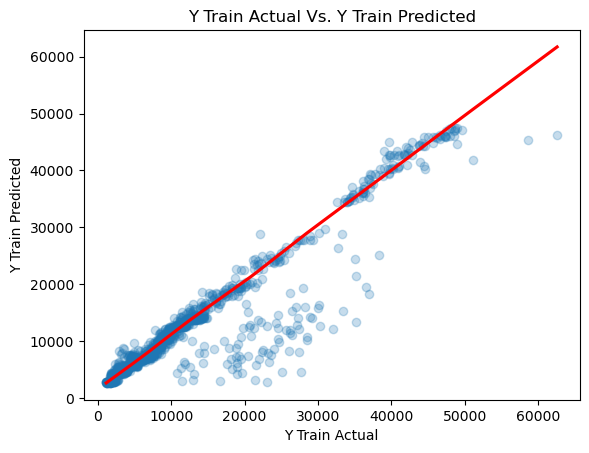

In [55]:
sns.regplot(
    x=y_train,
    y=predicted_train_data,
    lowess=True,                  # Add a locally weighted smoothing line
    line_kws={'color': 'red'},     # Color of regression line
    scatter_kws={'alpha': 0.25}    # Transparency of scatter points
)

plt.title("Y TRAIN ACTUAL VS. Y TRAIN PREDICTED".title())
plt.xlabel("Y Train Actual")
plt.ylabel("Y Train Predicted")
plt.show()


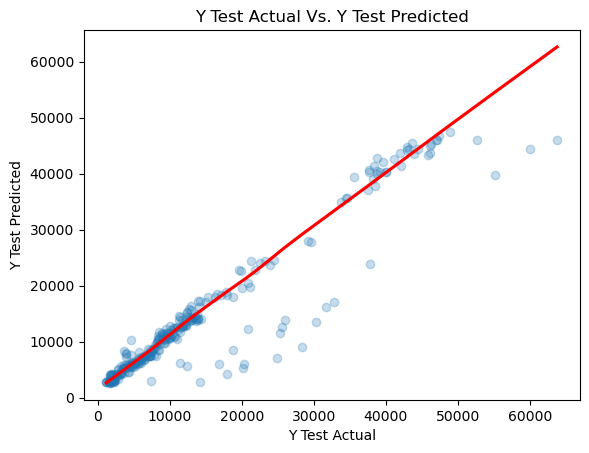

In [56]:
sns.regplot(
    x=y_test,
    y=predicted_test_data,
    lowess=True,                  # Add a locally weighted smoothing line
    line_kws={'color': 'red'},     # Color of regression line
    scatter_kws={'alpha': 0.25}    # Transparency of scatter points
)

plt.title("Y TEST ACTUAL VS. Y TEST PREDICTED".title())
plt.xlabel("Y Test Actual")
plt.ylabel("Y Test Predicted")
plt.show()


#### Customized Predictions:

In [64]:
age = 24
sex = 1
bmi = 35
children = 3
smoker = 1
region = 3

In [65]:
age1 = std_scaler.transform(np.array([[24]]))
bmi1 = std_scaler.transform(np.array([[35]]))
cld1 = std_scaler.transform(np.array([[3]]))

In [59]:
print(age1)
print(bmi1)
print(cld1)

[[19.00578687]]
[[28.13350484]]
[[1.58014347]]


In [67]:
RF.predict([[age1[0][0] , sex , bmi1[0][0], cld1[0][0] , smoker , region]])

D:\Users\Anshul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([18038.17070405])